In [14]:
import pandas as pd
from sklearn import preprocessing, preprocessing
import matplotlib.dates as mdates

In [15]:
df = pd.read_pickle('tsla.pkl')

In [16]:
df

Adj Close                    Close                     High  \
                  TSLA        ^IXIC        TSLA        ^IXIC        TSLA   
Date                                                                       
2012-01-03   28.080000  2648.719971   28.080000  2648.719971   29.500000   
2012-01-04   27.709999  2648.360107   27.709999  2648.360107   28.670000   
2012-01-05   27.120001  2669.860107   27.120001  2669.860107   27.930000   
2012-01-06   26.910000  2674.219971   26.910000  2674.219971   27.790001   
2012-01-09   27.250000  2676.560059   27.250000  2676.560059   27.490000   
...                ...          ...         ...          ...         ...   
2020-04-27  798.750000  8730.160156  798.750000  8730.160156  799.489990   
2020-04-28  769.119995  8607.730469  769.119995  8607.730469  805.000000   
2020-04-29  800.510010  8914.709961  800.510010  8914.709961  803.200012   
2020-04-30  781.880005  8889.549805  781.880005  8889.549805  869.820007   
2020-05-01  701.320007  8604.950195  701.320007  8604.950195  772.770020   

                                Low                     Open               \
                  ^IXIC        TSLA        ^IXIC        TSLA        ^IXIC   
Date                                                                        
2012-01-03  2665.899902   27.650000  2641.979980   28.940001  2657.389893   
2012-01-04  2653.179932   27.500000  2627.229980   28.209999  2639.899902   
2012-01-05  2673.560059   26.850000  2631.229980   27.760000  2642.570068   
2012-01-06  2682.120117   26.410000  2658.830078   27.200001  2671.169922   
2012-01-09  2683.780029   26.120001  2662.959961   27.000000  2682.979980   
...                 ...         ...          ...         ...          ...   
2020-04-27  8754.570312  735.000000  8697.370117  737.609985  8717.980469   
2020-04-28  8830.570312  756.690002  8600.700195  795.640015  8825.690430   
2020-04-29  8957.269531  783.159973  8765.009766  790.169983  8802.700195   
2020-04-30  8926.110352  763.500000  8825.830078  855.190002  8911.019531   
2020-05-01  8754.459961  683.039978  8566.839844  755.000000  8681.290039   

              Volume              
                TSLA       ^IXIC  
Date                              
2012-01-03    928100  1636850000  
2012-01-04    630100  1670530000  
2012-01-05   1005500  1836410000  
2012-01-06    986300  1683090000  
2012-01-09    897000  1768080000  
...              ...         ...  
2020-04-27  20681400  3678460000  
2020-04-28  15222000  3707540000  
2020-04-29  16216000  4378540000  
2020-04-30  28471900  4316380000  
2020-05-01  32531800  3722520000  

[2096 rows x 12 columns]

In [17]:
def norm(df):
    return (df - df.mean()) / (df.max() - df.min())

In [18]:
df.describe()

Adj Close                     Close                      High  \
              TSLA        ^IXIC         TSLA        ^IXIC         TSLA   
count  2096.000000  2096.000000  2096.000000  2096.000000  2096.000000   
mean    229.900091  5437.025539   229.900091  5437.025539   234.301584   
std     130.966438  1785.375350   130.966438  1785.375350   134.713966   
min      22.790001  2648.360107    22.790001  2648.360107    26.850000   
25%     178.992500  4113.585083   178.992500  4113.585083   183.805000   
50%     229.750000  5033.155029   229.750000  5033.155029   233.315002   
75%     299.140007  7082.062622   299.140007  7082.062622   304.652504   
max     917.419983  9817.179688   917.419983  9817.179688   968.989990   

                            Low                      Open               \
             ^IXIC         TSLA        ^IXIC         TSLA        ^IXIC   
count  2096.000000  2096.000000  2096.000000  2096.000000  2096.000000   
mean   5465.564963   225.278182  5403.337649   229.860735  5435.715542   
std    1797.352796   127.289293  1772.041412   131.067004  1785.006385   
min    2653.179932    22.639999  2627.229980    26.620001  2639.899902   
25%    4133.322388   175.189999  4080.722534   179.079998  4109.679932   
50%    5053.040039   225.900002  5009.289795   229.845001  5030.104980   
75%    7162.512573   293.557487  7014.489868   299.125000  7090.822510   
max    9838.370117   901.020020  9777.099609   923.500000  9799.200195   

             Volume                
               TSLA         ^IXIC  
count  2.096000e+03  2.096000e+03  
mean   6.771990e+06  1.994219e+09  
std    5.672887e+06  5.038134e+08  
min    3.649000e+05  1.494100e+08  
25%    3.332325e+06  1.726905e+09  
50%    5.418350e+06  1.900985e+09  
75%    8.296200e+06  2.144240e+09  
max    6.093880e+07  5.301170e+09

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2096 entries, 2012-01-03 to 2020-05-01
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   (Adj Close, TSLA)   2096 non-null   float64
 1   (Adj Close, ^IXIC)  2096 non-null   float64
 2   (Close, TSLA)       2096 non-null   float64
 3   (Close, ^IXIC)      2096 non-null   float64
 4   (High, TSLA)        2096 non-null   float64
 5   (High, ^IXIC)       2096 non-null   float64
 6   (Low, TSLA)         2096 non-null   float64
 7   (Low, ^IXIC)        2096 non-null   float64
 8   (Open, TSLA)        2096 non-null   float64
 9   (Open, ^IXIC)       2096 non-null   float64
 10  (Volume, TSLA)      2096 non-null   int64  
 11  (Volume, ^IXIC)     2096 non-null   int64  
dtypes: float64(10), int64(2)
memory usage: 212.9 KB


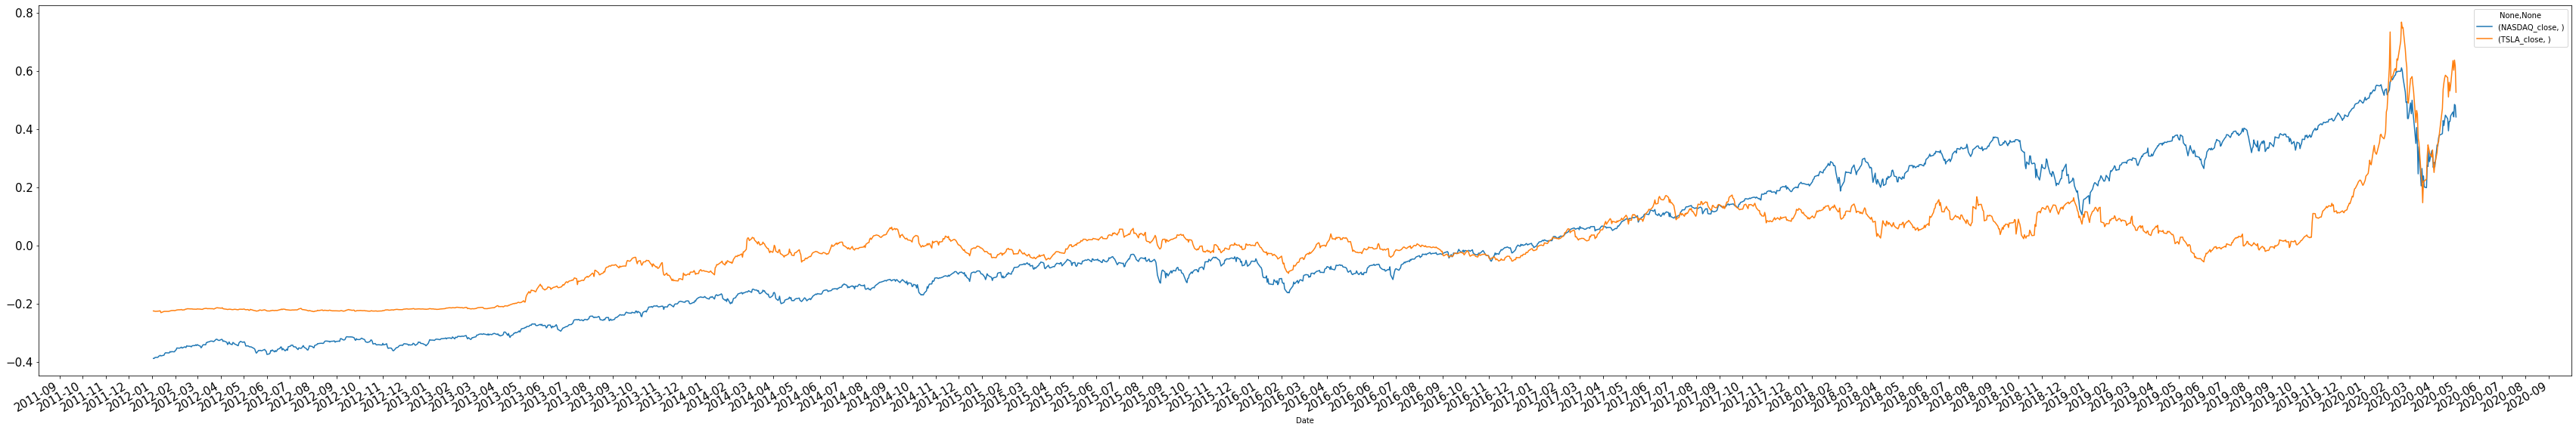

In [20]:
df['TSLA_close'] = norm(df['Close']['TSLA'])
df['NASDAQ_close'] = norm(df['Close']['^IXIC'])
df[['NASDAQ_close', 'TSLA_close']].plot(figsize=(60,10), fontsize=15).xaxis.set_major_locator(mdates.MonthLocator())

In [21]:
df.drop(['Adj Close', 'High', 'Low', 'Open'], axis=1, inplace=True)
df.index = df.index.tz_localize('EST')

In [22]:
df['TSLA_diff'] = df['Close']['TSLA'].diff()
df['NASDAQ_diff'] = df['Close']['^IXIC'].diff()

In [23]:
df['TSLA_close_pre'] = df['Close']['TSLA'].shift(1)
df['NASDAQ_close_pre'] = df['Close']['^IXIC'].shift(1)
df['TSLA_close_%'] = df['TSLA_diff']/df['TSLA_close_pre'] 
df['NASDAQ_close_%'] = df['NASDAQ_diff']/df['NASDAQ_close_pre'] 
df['net_close_%'] =  df['TSLA_close_%'] - df['NASDAQ_close_%'] 

In [24]:
tsla_diff = df['TSLA_diff']
nasdaq_diff = df['NASDAQ_diff']

df['TSLA_diff'] = norm(tsla_diff)
df['NASDAQ_diff'] = norm(nasdaq_diff)
df['net_diff'] =  df['TSLA_diff'] - df['NASDAQ_diff'] 
# pos doing doing better, neg doing worst than nasdaq


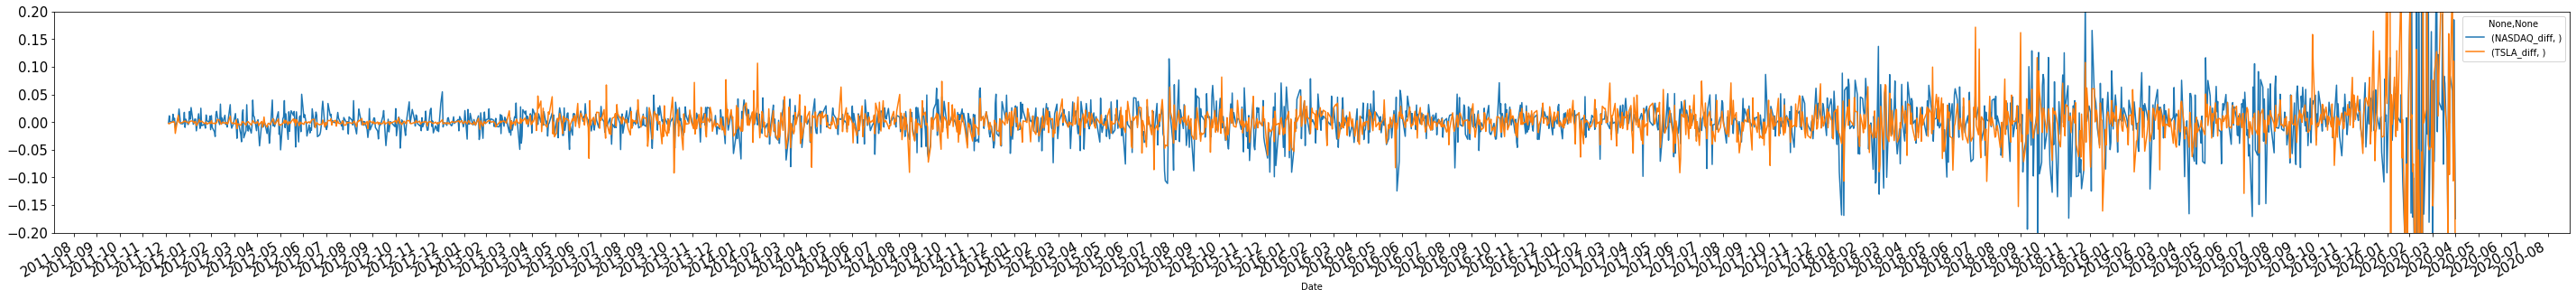

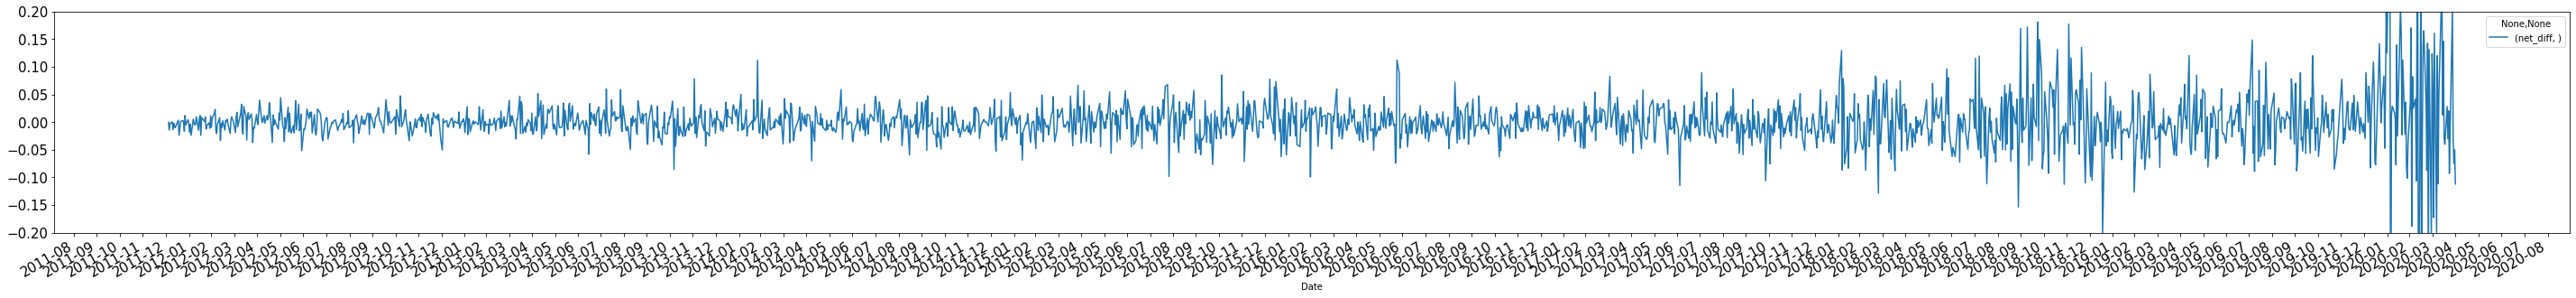

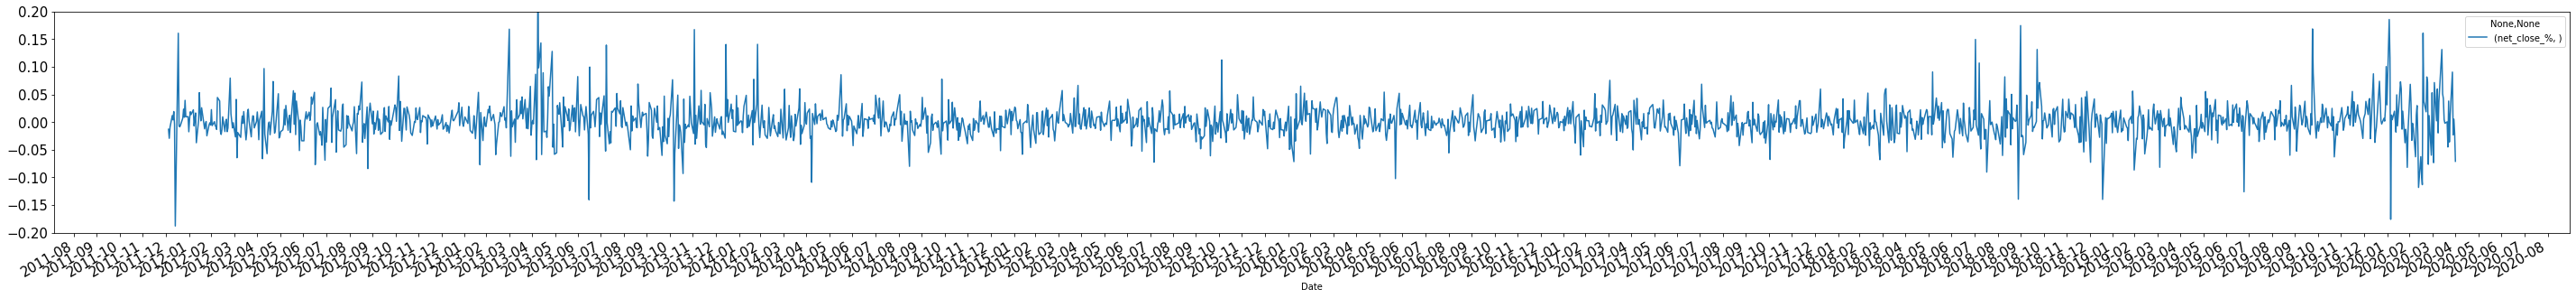

In [25]:
df[['NASDAQ_diff', 'TSLA_diff']].plot(figsize=(50,5), fontsize=15, ylim=(-0.2, 0.2), x_compat=True).xaxis.set_major_locator(mdates.MonthLocator())
df[['net_diff']].plot(figsize=(50,5), fontsize=15, ylim=(-0.2, 0.2)).xaxis.set_major_locator(mdates.MonthLocator())
df[['net_close_%']].plot(figsize=(50,5), fontsize=15, ylim=(-0.2, 0.2)).xaxis.set_major_locator(mdates.MonthLocator())

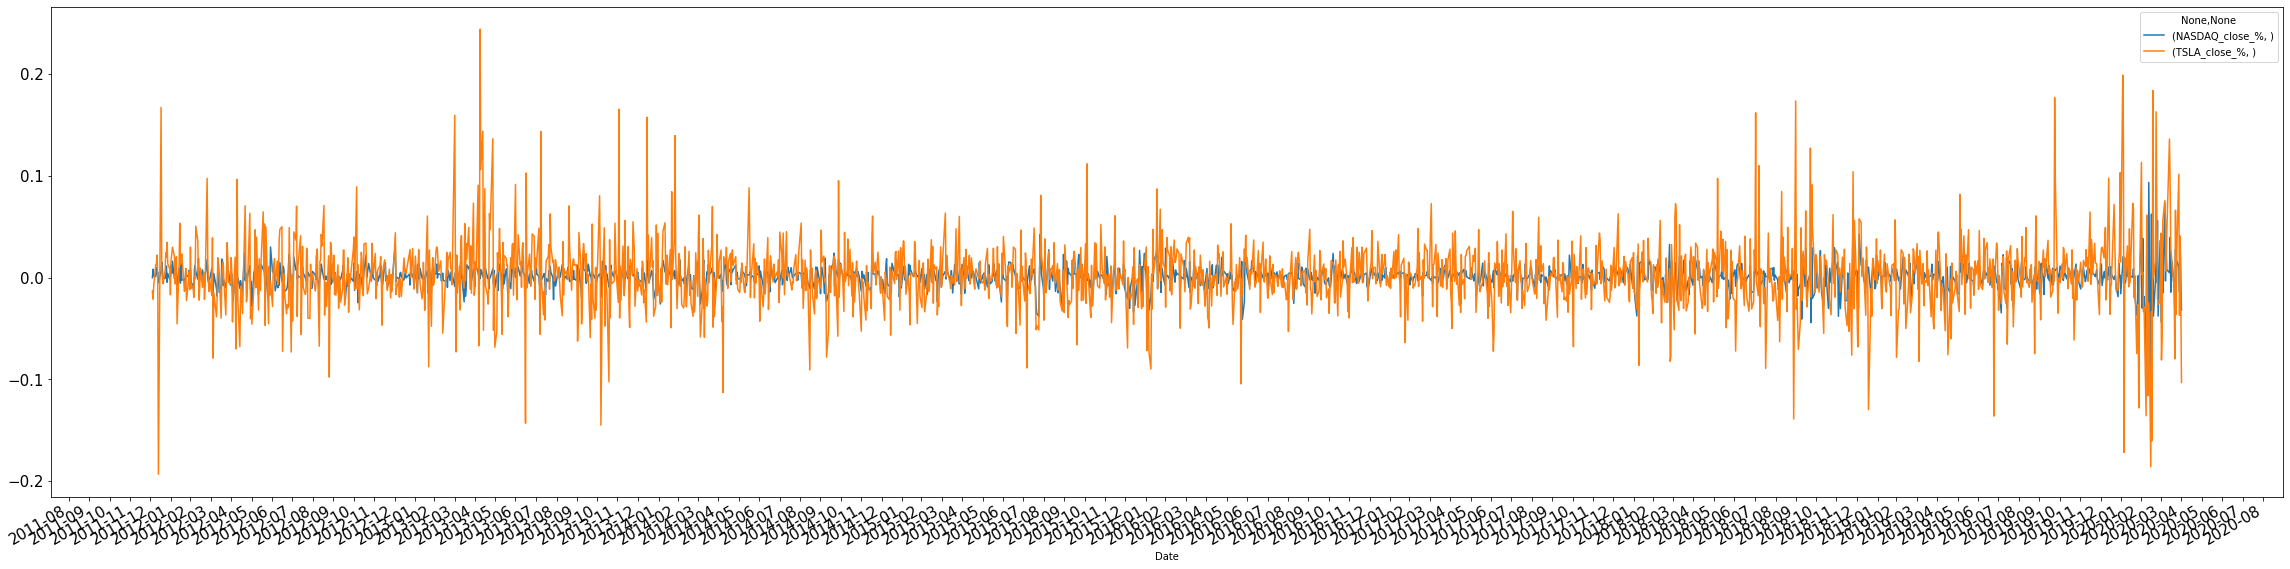

In [26]:
df[['NASDAQ_close_%', 'TSLA_close_%']].plot(figsize=(40,10), fontsize=15).xaxis.set_major_locator(mdates.MonthLocator())

In [27]:
tsla_vol = df['Volume']['TSLA']
nasdaq_vol = df['Volume']['^IXIC']
df['TSLA_vol'] = norm(tsla_vol)
df['NASDAQ_vol'] = norm(nasdaq_vol)
df['net_vol'] =  df['TSLA_vol'] - df['NASDAQ_vol'] 

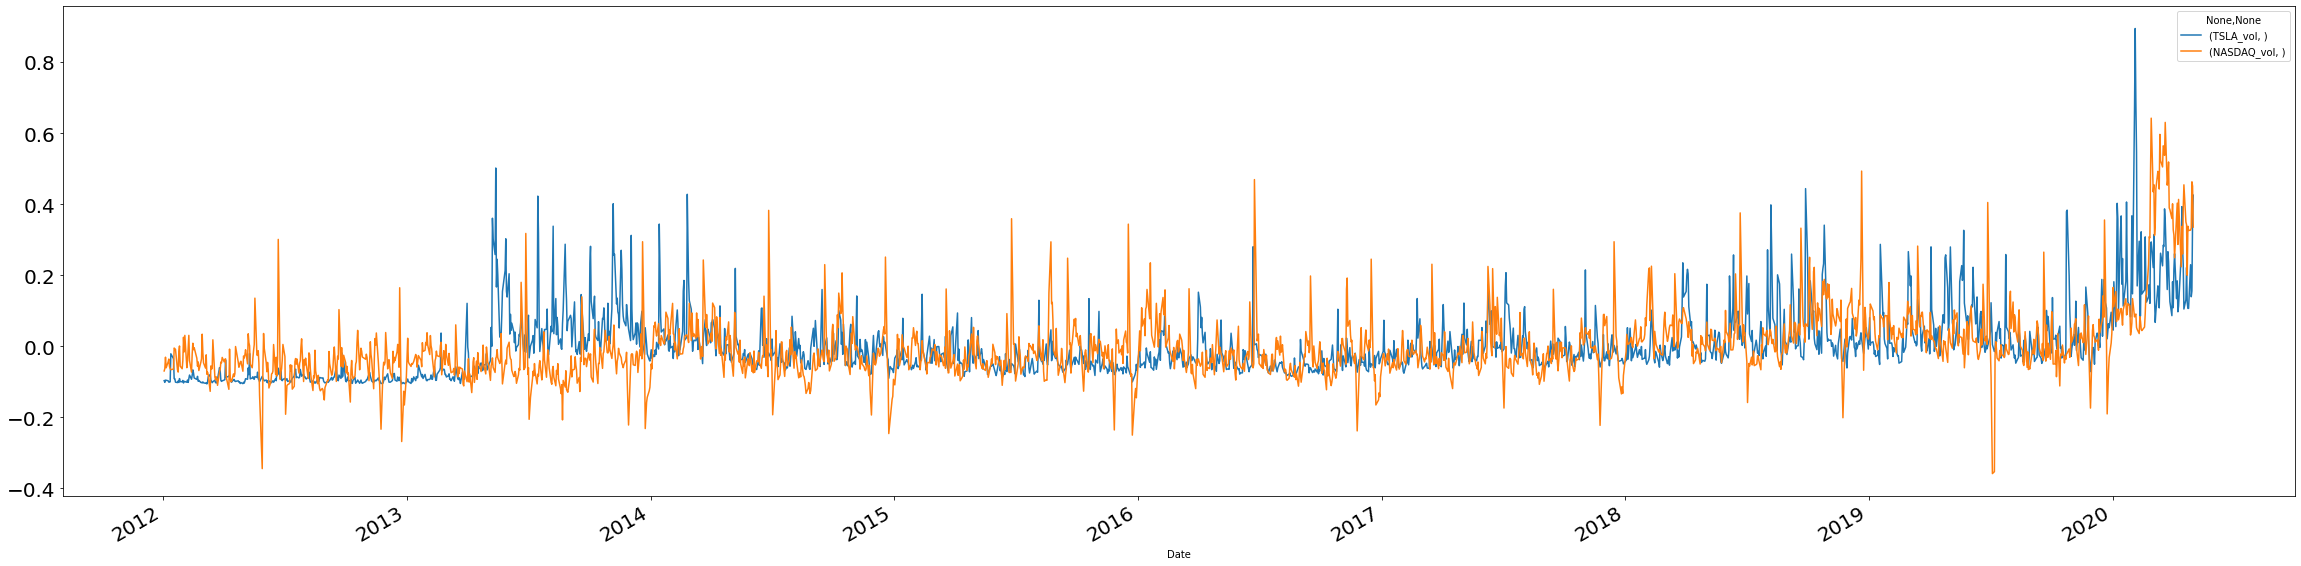

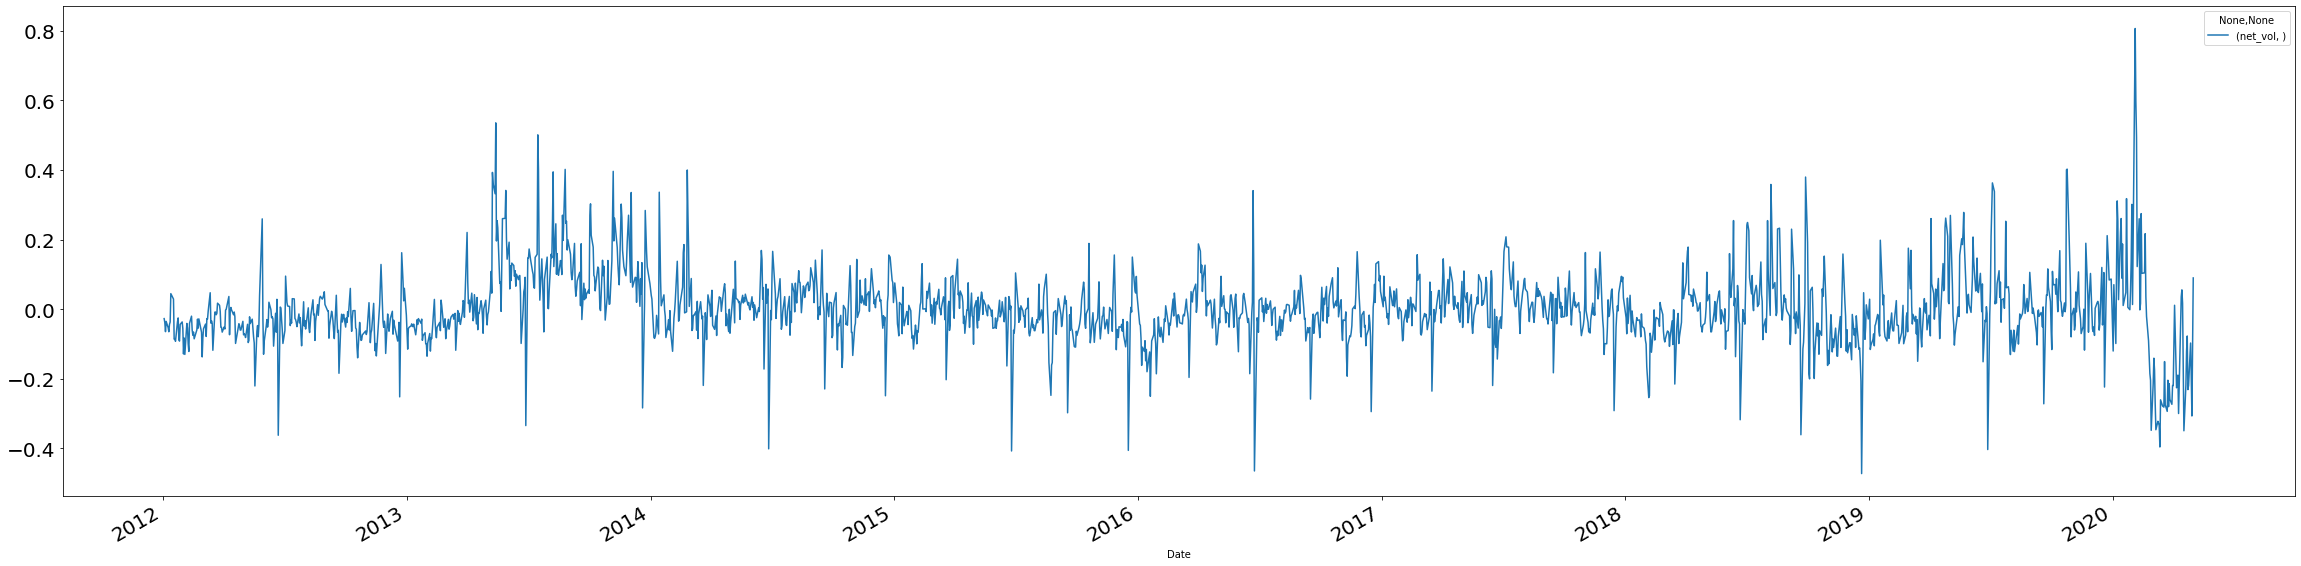

In [28]:
df[['TSLA_vol', 'NASDAQ_vol']].plot(figsize=(40,10), fontsize=20)
df[['net_vol']].plot(figsize=(40,10), fontsize=20)

In [29]:
df.drop(['Close', 'Volume'], inplace=True, axis=1)
df.drop(df[df['TSLA_diff'].isnull()].index)

,TSLA_close,NASDAQ_close,TSLA_diff,NASDAQ_diff,TSLA_close_pre,NASDAQ_close_pre,TSLA_close_%,NASDAQ_close_%,net_close_%,net_diff,TSLA_vol,NASDAQ_vol,net_vol
,,,,,,,,,,,,,
Date,,,,,,,,,,,,,
2012-01-04 00:00:00-05:00,-0.226004,-0.388999,-0.002453,-0.001949,28.080000,2648.719971,-0.013177,-0.000136,-0.013041,-0.000504,-0.101395,-0.062831,-0.038564
2012-01-05 00:00:00-05:00,-0.226664,-0.386000,-0.003234,0.011353,27.709999,2648.360107,-0.021292,0.008118,-0.029410,-0.014587,-0.095198,-0.030632,-0.064565
2012-01-06 00:00:00-05:00,-0.226898,-0.385392,-0.001886,0.000923,27.120001,2669.860107,-0.007743,0.001633,-0.009376,-0.002809,-0.095515,-0.060393,-0.035122
2012-01-09 00:00:00-05:00,-0.226518,-0.385066,0.000066,-0.000306,26.910000,2674.219971,0.012635,0.000875,0.011760,0.000372,-0.096989,-0.043896,-0.053093
2012-01-10 00:00:00-05:00,-0.226105,-0.381447,0.000173,0.014055,27.250000,2676.560059,0.013578,0.009692,0.003886,-0.013882,-0.100707,-0.035856,-0.064851
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-04-27 00:00:00-05:00,0.635849,0.459369,0.260047,0.056468,725.150024,8634.519531,0.101496,0.011077,0.090420,0.203579,0.229627,0.326925,-0.097298
2020-04-28 00:00:00-05:00,0.602730,0.442291,-0.106290,-0.076229,798.750000,8730.160156,-0.037095,-0.014024,-0.023072,-0.030060,0.139499,0.332570,-0.193071


In [30]:
df.drop(['TSLA_close', 'NASDAQ_close',	'TSLA_diff', 'NASDAQ_diff',	'TSLA_close_pre','NASDAQ_close_pre', 'TSLA_vol',	'NASDAQ_vol'], axis=1, inplace=True)

In [31]:
df.to_pickle('stocks_processed.pkl')

In [32]:
df

,TSLA_close_%,NASDAQ_close_%,net_close_%,net_diff,net_vol
,,,,,
Date,,,,,
2012-01-03 00:00:00-05:00,NaN,NaN,NaN,NaN,-0.027107
2012-01-04 00:00:00-05:00,-0.013177,-0.000136,-0.013041,-0.000504,-0.038564
2012-01-05 00:00:00-05:00,-0.021292,0.008118,-0.029410,-0.014587,-0.064565
2012-01-06 00:00:00-05:00,-0.007743,0.001633,-0.009376,-0.002809,-0.035122
2012-01-09 00:00:00-05:00,0.012635,0.000875,0.011760,0.000372,-0.053093
...,...,...,...,...,...
2020-04-27 00:00:00-05:00,0.101496,0.011077,0.090420,0.203579,-0.097298
2020-04-28 00:00:00-05:00,-0.037095,-0.014024,-0.023072,-0.030060,-0.193071
